### CNN Model for Fashion MNIST

#### Summary: 

 Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples 
 and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [2]:
from subprocess import check_output

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import  Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 5

Using TensorFlow backend.


### Data Description

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated 
with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 
The training and test data sets have 785 columns. The first column consists of the class labels , and represents the article of clothing.
The rest of the columns contain the pixel-values of the associated image.

##### Lables

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [31]:
train = pd.read_csv('C:\\Users\\maryam\\Desktop\\Python Program\\Deep Learning\\fashion-mnist_train.csv',sep=',')
test = pd.read_csv('C:\\Users\\maryam\\Desktop\\Python Program\\Deep Learning\\fashion-mnist_test.csv', sep = ',')

In [32]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here each row is a different image representation in the form pixel data.

Now let us split the train data into x and y arrays where x represents the image data and y represents the labels.

To do that we need to convert the dataframes into numpy arrays of float32 type 
which is the acceptable form for tensorflow and keras.

In [34]:
train_data = np.array(train, dtype = 'float32')

In [35]:
test_data = np.array(test, dtype = 'float32')

Now let us slice the train arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively
and the test arrays into x and y arrays namely x_test,y_test.

x_train contains all the rows and all columns except the label column and excluding header info .
y_train contains all the rows and first column and excluding header info .

x_test contains all the rows and all columns except the label column and excluding header info .
y_test contains all the rows and first column and excluding header info .

###### Since the image data in x_train and x_test is from 0 to 255 , we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255

In [36]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

Now we are gonna split the training data into validation and actual training data for training the model and testing it using the validation set.

In [37]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

Now let us visualise the sample image how it looks like in 28 * 28 pixel size

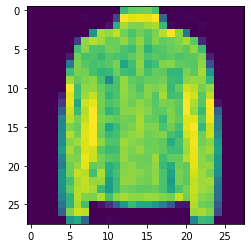

In [38]:
image = x_train[55,:].reshape((28,28))
plt.imshow(image)
plt.show()

#### Create the Convolutional Neural Networks (CNN)

1) Define the model

2) Compile the model

3) Fit the model

Defining the shape of the image before we define the model

In [39]:
image_rows = 28

image_cols = 28

batch_size = 512

image_shape = (image_rows,image_cols,1) # Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation

In [40]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

1)Define Model

In [41]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

2) Compile the Model

In [42]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [43]:
history=cnn_model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=50,
verbose=1,
validation_data=(x_validate,y_validate)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 21s 435us/step - loss: 0.7716 - accuracy: 0.7489 - val_loss: 0.4951 - val_accuracy: 0.8266
Epoch 2/50
48000/48000 [==============================] - 21s 433us/step - loss: 0.4503 - accuracy: 0.8432 - val_loss: 0.4044 - val_accuracy: 0.8630
Epoch 3/50
48000/48000 [==============================] - 20s 412us/step - loss: 0.3988 - accuracy: 0.8605 - val_loss: 0.3899 - val_accuracy: 0.8682
Epoch 4/50
48000/48000 [==============================] - 20s 410us/step - loss: 0.3716 - accuracy: 0.8700 - val_loss: 0.3626 - val_accuracy: 0.8737
Epoch 5/50
48000/48000 [==============================] - 20s 424us/step - loss: 0.3489 - accuracy: 0.8785 - val_loss: 0.3379 - val_accuracy: 0.8860
Epoch 6/50
48000/48000 [==============================] - 21s 445us/step - loss: 0.3293 - accuracy: 0.8863 - val_loss: 0.3253 - val_accuracy: 0.8861
Epoch 7/50
48000/48000 [==============================] 

4) Evaluate the Model

In [44]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2454
Test Accuracy : 0.9214


#### Result

In [45]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

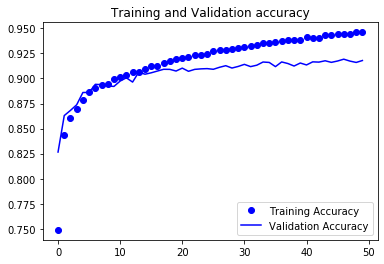

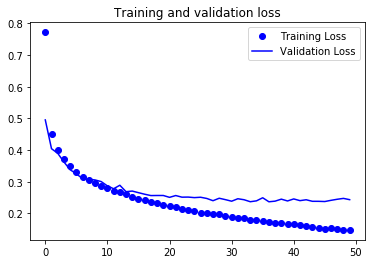

In [46]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['accuracy']

val_accuracy = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')

plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')

plt.title('Training and Validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')

plt.plot(epochs, val_loss, 'b', label='Validation Loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()


#### Classification Report

In [47]:
#get the predictions for the test data

predicted_classes = cnn_model.predict_classes(x_test)

#get the indices to be plotted

y_true = test.iloc[:, 0]

correct = np.nonzero(predicted_classes==y_true)[0]

incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_true, predicted_classes, target_names=target_names))
          


              precision    recall  f1-score   support

     Class 0       0.85      0.91      0.88      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.90      0.86      0.88      1000
     Class 3       0.89      0.94      0.92      1000
     Class 4       0.88      0.91      0.89      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.83      0.72      0.77      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



It's apparent that our classifier is underperforming for class 6 in terms of both precision and recall. For class 2, classifier is slightly lacking precision whereas it is slightly lacking recall (i.e. missed) for class 4.

###### A subset of correctly predicted classes

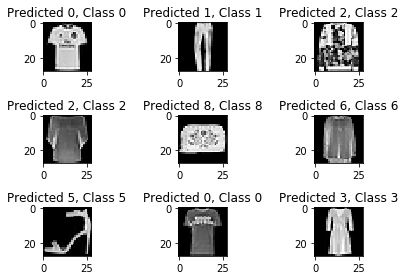

In [50]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

##### A subset of incorrectly predicted classes

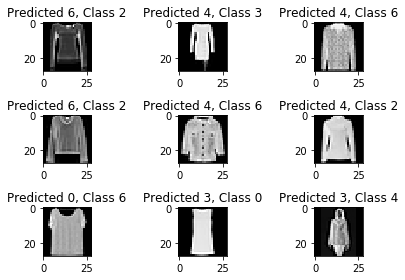

In [52]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

It looks like diversity of the similar patterns present on multiple classes effect the performance of the classifier although CNN is a robust architechture.